<center><h1> Deep Learning Demonstrations with Keras</h1></center> 

This code is an implementation of simple deep learning tasks using the scikit-learn dataset and functions, as well
as keras.
It represents a good guide for the beginners in programming Deep Learning algorithms.

In here we import some useful libraries, such as: scikit-learn and matplotlib.

In [1]:
from sklearn.datasets import make_blobs,make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## First the classification problem

In [2]:
position,classes = make_blobs(n_features=2,n_samples=2000,centers=2)

Showing the data. As it is possible to see, we have two classes, as we defined in the parameter _center_ in the function make blobs, and also our data is two-dimensional, as defined by the parameter _n_features.

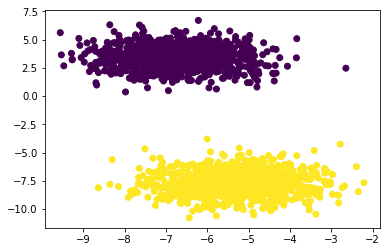

In [3]:
plt.scatter(position[:,0], position[:,1], c=classes)
plt.show()

This is a very useful function from sklearn _(scikit-learn)_ that automatically separates the data into train and test sets. You can use it at your own projects as well, as it is very simple to implement.

In [4]:
x_train,x_test, y_train, y_test=train_test_split(position,classes,test_size=0.2)

Here we import from Keras useful stuff for the construction of the model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Here we actually build our model. That are four important steps when constructing a Keras model:

    1.declare the model, done by:
       model=Sequential()
    2.add layers to the model, as well as it's activation functions, done by:
        model.add(Dense(10,activation='relu'))
    3.compile the model, definig the optimizer and the loss that you want to use, done by:        
        model.compile(optimizer='Adam',loss='mse')
    4.fit the model into your training data,defining the number of epochs, done by:    
        model.fit(x_train,y_train,epochs=20)

In [6]:
model=Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='mse')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1600/1600 [==============================] - 0s 48us/step - loss: 0.3091
Epoch 2/20
1600/1600 [==============================] - 0s 18us/step - loss: 0.1542
Epoch 3/20
1600/1600 [==============================] - 0s 29us/step - loss: 0.0766
Epoch 4/20
1600/1600 [==============================] - 0s 20us/step - loss: 0.0418
Epoch 5/20
1600/1600 [==============================] - 0s 20us/step - loss: 0.0252
Epoch 6/20
1600/1600 [==============================] - 0s 20us/step - loss: 0.0164
Epoch 7/20
1600/1600 [==============================] - 0s 17us/step - loss: 0.0114
Epoch 8/20
1600/1600 [==============================] - 0s 21us/step - loss: 0.0084
Epoch 9/20
1600/1600 [==============================] - 0s 21us/step - loss: 0.0064
Epoch 10/20
1600/1600 [==============================] - 0s 23us/step - loss: 0.0051
Epoch 11/20
1600/1600 [==============================] - 0s 18us/step - loss: 0.0041
Epoch 12/20
1600/1600 [==============================] - 0s 16us/step - lo

With the _model.summary()_ command you can view the layers of your model, as well as some useful information about it
such as the number of trainable parameters, in this case: 41.

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Here we perform some evaluation on the test set, which was never seen by the model:

In [8]:
model.evaluate(x_test,y_test)

400/400 [==============================] - 0s 8us/step


0.0009039307711645961

This is a really cool function that allows you to see the boundaries defined by the model into your data.

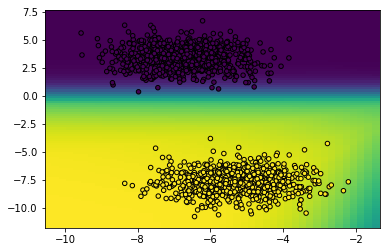

In [9]:
from matplotlib.colors import ListedColormap
import numpy as np
def plot_boundaries(model,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = model.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(model,x_train,y_train)

In here we plot the confusion matrix.

If you do not know what it is, basically:

**_A confusion matrix is a summary of prediction results on a classification problem._**
        
If you want a more detailed explanation about it, you can check it here:

https://machinelearningmastery.com/confusion-matrix-machine-learning/

Training Set:


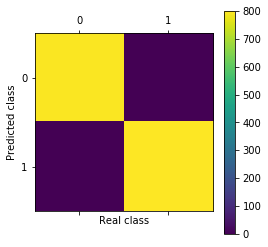

In [10]:
from sklearn import metrics
def predicting(x):    
    y_pred = model.predict(x)
    y_pred[y_pred<0.5]=0
    y_pred[y_pred>=0.5]=1
    return y_pred
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = predicting(x_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
#print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.show()

Test Set:


Text(0, 0.5, 'Predicted class')

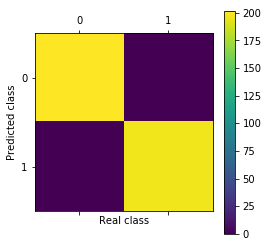

In [11]:
y_pred_test = predicting(x_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
#print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

## Second, the regression problem:

Here we are going to repeat the same procedure as before, but generating a different type of data, a line, so that we
know the distribution, which will make us able to evaluate the performance.

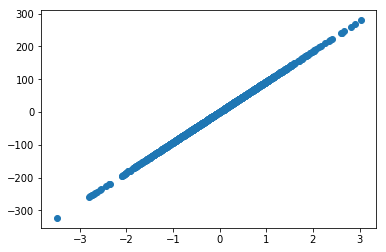

In [30]:
x,y=make_regression(n_features=1,n_samples=1000)
plt.scatter(x,y)
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x.reshape(-1, 1))
y=scaler.fit_transform(y.reshape(-1, 1))
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [34]:
model=Sequential()
model.add(Dense(1,activation='linear'))
#model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mae')
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
800/800 [==============================] - 0s 14us/step - loss: 0.4451
Epoch 2/10
800/800 [==============================] - 0s 19us/step - loss: 0.4069
Epoch 3/10
800/800 [==============================] - 0s 22us/step - loss: 0.3687
Epoch 4/10
800/800 [==============================] - 0s 24us/step - loss: 0.3306
Epoch 5/10
800/800 [==============================] - 0s 23us/step - loss: 0.2929
Epoch 6/10
800/800 [==============================] - 0s 26us/step - loss: 0.2558
Epoch 7/10
800/800 [==============================] - 0s 35us/step - loss: 0.2191
Epoch 8/10
800/800 [==============================] - 0s 29us/step - loss: 0.1838
Epoch 9/10
800/800 [==============================] - 0s 33us/step - loss: 0.1517
Epoch 10/10
800/800 [==============================] - 0s 34us/step - loss: 0.1237


In [35]:
model.evaluate(x_test,y_test)

200/200 [==============================] - 0s 8us/step


0.10581438601016999